## goal: visualize top skills for data analyst 

In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
df=pd.read_csv('https://lukeb.co//python_csv')
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
import ast
df['job_skills'] = df['job_skills'].apply(
    lambda skill: ast.literal_eval(skill) if isinstance(skill, str) else skill
)

c:\Users\HP\anaconda3\envs\pn_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#we use explode method to clean up 
data = {
    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}

df_skills = pd.DataFrame(data)

df_skills

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


In [21]:
#how to get value of key in dictionary  :
data['job_skills']

[['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]

In [ ]:
#goal count how many appear python
df_skills.explode('job_skills')

,job_title_short,job_skills
0,Data Analyst,excel
0,Data Analyst,sql
0,Data Analyst,python
1,Data Scientist,python
1,Data Scientist,r
2,Data Engineer,aws
2,Data Engineer,python
2,Data Engineer,airflow


In [7]:
df_skills.explode('job_skills').value_counts('job_skills')

job_skills
python     3
airflow    1
aws        1
excel      1
r          1
sql        1
Name: count, dtype: int64

<Axes: xlabel='job_skills'>

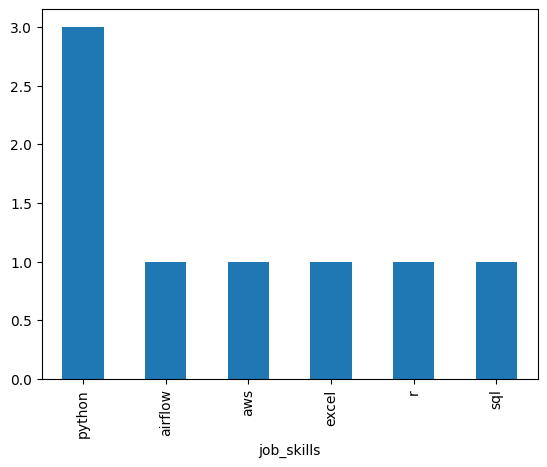

In [8]:
df_skills.explode('job_skills').value_counts('job_skills').plot(kind='bar')

In [14]:
df[['job_title_short','job_skills']].head(5)

,job_title_short,job_skills
0,Senior Data Engineer,NaN
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


In [3]:
df[['job_title_short','job_skills']].head(5).explode('job_skills',ignore_index=True)

,job_title_short,job_skills
0,Senior Data Engineer,NaN
1,Data Analyst,r
2,Data Analyst,python
3,Data Analyst,sql
4,Data Analyst,nosql
5,Data Analyst,power bi
6,Data Analyst,tableau
7,Data Engineer,python
8,Data Engineer,sql
9,Data Engineer,c#


In [ ]:
#Sequence: An iterable like a list or tuple in the job_skills column, 
# which explode() unpacks into separate rows.
#Hashable: Elements that can be dictionary keys
#explode function in pandas transforms DataFrame column containing lists (or other iterable objects) 
#It "explodes" the list, creating a new row for each element in the list, 
# while copies the values of all other columns in the DataFrame for each of those new rows.

In [5]:
#frist to achive goal
df_exploded=df.explode('job_skills')

In [6]:
df_exploded.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."


<Axes: xlabel='job_skills'>

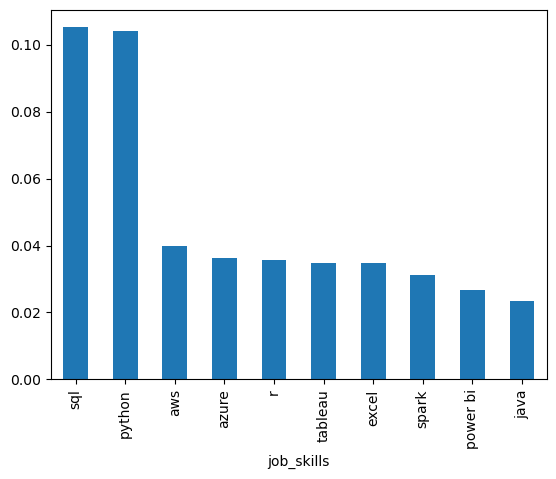

In [7]:
df_exploded['job_skills'].value_counts('job_skills').head(10).plot(kind='bar')

In [11]:
# second:i want to group it by jop title short and job_skills

skill_counts=df_exploded.groupby(['job_title_short','job_skills']).size()

In [12]:
skill_counts

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [13]:
#thrid:we need to convert series to datafram
df_skill_counts= skill_counts.reset_index(name='skill_counts')

In [14]:
df_skill_counts

,job_title_short,job_skills,skill_counts
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


In [15]:
#four

df_skill_counts=df_skill_counts.sort_values(by='skill_counts',ascending=False)
df_skill_counts

,job_title_short,job_skills,skill_counts
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [16]:
#fifth 
job_title='Data Engineer'
top= 10
df_skill_final=df_skill_counts[df_skill_counts['job_title_short'] == job_title].head(top)

In [102]:
df_skill_final

,job_title_short,job_skills,skill_counts
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
686,Data Engineer,aws,62049
687,Data Engineer,azure,60674
860,Data Engineer,spark,53656
763,Data Engineer,java,35559
770,Data Engineer,kafka,29073
755,Data Engineer,hadoop,28815
848,Data Engineer,scala,28716
712,Data Engineer,databricks,27477


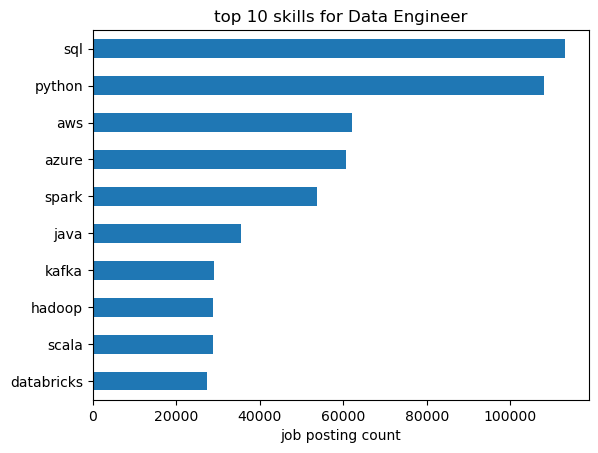

In [18]:
#sixth
df_skill_final[::-1].plot(kind='barh',x='job_skills',y='skill_counts')
#plt.gca().invert_yaxis()
plt.legend()
plt.title(f'top {top} skills for {job_title}') #now i know why use head(top) instead of head(10)
plt.xlabel('job posting count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

## summary

In [ ]:
#Series has only **one column of data, but it can have a **MultiIndex** (multiple index levels).
#Series is a one-dimensional object that can have a MultiIndex.
#grouping by job_title_short and job_skills creates a MultiIndex with two levels: 
# one for job_title_short and one for job_skills.
#grouping by has multindex if i have more than one column
#When is MultiIndex Useful?
#MultiIndexes are powerful for analyzing hierarchical data
#Grouping by multiple columns 
#Pivot tables or cross-tabulations.
#Time series data with multiple dimensions (e.g., year and month).

#You can avoid a MultiIndex by use reset_index function  after grouping,
# which turns the grouped columns(multiIndex) into regular DataFrame columns.
#name parameter reset_index(name=) specifies the name of the column that will hold  values of  Series
#plt.legend()function in Matplotlib adds legend to plot,which is small box that identifies plot elements

"""
(1) df_exploded.groupby(['job_title_short','job_skills']).size()
→ groups the DataFrame by TWO columns together (as a pair) and counts rows for each (job_title_short, job_skills) combination.

(2) df_exploded.groupby('job_title_short')['salary'].size()
→ first groups by ONE column, then selects the 'salary' column within each group before counting entries.
"""